In [22]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import random
from citipy import citipy
import csv
import requests
from config import OWM_api_key
import time

In [23]:
#Create a list of unique cities and create a dataframe.

# Here is the logic :
# Latitude values range from -90 to +90 degrees and longitude values range from -180 to +180 degrees.
# Majority of world's landmass, countries and cities are located in the northern hemisphere.
# The focus of this exercise is to understand how 
# the temperature, humidity, cloudiness and windspeed vary with latitude,
# to get a good spread of data, for every latitude starting from -90 deg latitude (southern pole)
# I tried to get 10 random longitudes. I used random.sample to get unique longtitude values.
# I created a list to hold the unique city and country combinations.
# I populated the this list by using citipy library for each latitude and longitude combination.
# The list gets populated only with unique combinations.
# I also tried to limit the number of chosen cities per latitude to 5 to make to get a more vaired spred.


# create an empty list for the cities.
citiesCountry=[]

columns = ['City','Country']
citiesCountryDf = pd.DataFrame()

for i in range(-90,90): # looping through the latitudes
    
    lat = i + random.random() 
    lng = random.sample(range(-180,180),10) # randomly selecting 10 longitudes

    k=0 # variables to count the number of cities per each latitude
    for j in range(0,10):        
        city = citipy.nearest_city(lat, lng[j]+random.random())
        city_name = city.city_name
        country_code = city.country_code
        curCity = city_name + "," + country_code
        if curCity not in citiesCountry:
            citiesCountry.append(city_name + "," + country_code)
            
            # ADD THE CITY AND COUNTRY CODE TO THE citiesCountryDf
            tempDf = pd.DataFrame({'City':city_name,'Country': country_code.upper()}, index = [0])
            citiesCountryDf = citiesCountryDf.append(tempDf, ignore_index = True)
           
            k=k+1
        if(k==5): # If you got 5 unique cities per latitude move on to the next one.
            break
# Expand the dataframe to include the fields for latitude, temperature, humidity, cloudiness and windspeed
citiesCountryDf['Latitude']=0
citiesCountryDf['Temperature']=0
citiesCountryDf['Humidity']=0
citiesCountryDf['Cloudiness']=0
citiesCountryDf['Wind Speed']=0
citiesCountryDf['APICall']=""

Today_Date=  pd.to_datetime('today').strftime("%m/%d/%Y")

citiesCountryDf.count()

City           598
Country        598
Latitude       598
Temperature    598
Humidity       598
Cloudiness     598
Wind Speed     598
APICall        598
dtype: int64

In [24]:

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={OWM_api_key}&units={units}&q="



In [25]:
# Now that you have the city and country codes, time to make the API calls
# Loop through the dataframe and perform a request for data on each city and country combo.
# test for the first 5 city and country combo and run all the APIs
a=0
for index, row in citiesCountryDf.iterrows():
    # Sleep for 5 seconds before each API call
    for i in range(10):
        time.sleep(.05)
   
    target_url = ""
    target_url =  query_url + row['City'].replace(" ","%20")+","+row['Country']
    #print(target_url)
    response_Test = requests.get(target_url)
    #a = a+1
    if response_Test.status_code == 200:
        response = response_Test.json() 
        citiesCountryDf.loc[index,"Latitude"] = (response['coord']['lat'])
        citiesCountryDf.loc[index,"Temperature"]=(response['main']['temp_max'])
        citiesCountryDf.loc[index,"Humidity"]=(response['main']['humidity'])
        citiesCountryDf.loc[index,"Wind Speed"]=(response['wind']['speed'])
        citiesCountryDf.loc[index,"Cloudiness"]=(response['clouds']['all']) 
        citiesCountryDf.loc[index,"APICall"]=(target_url) 
        #a = a+1
        #print(a)
        #print(target_url)
        
        #if(a == 100):
         #   break
    else:
        citiesCountryDf.drop(index, inplace=True)
    #print(response_Test.status_code)  
    #if(a == 5):
    #    break
             
citiesCountryDf.to_csv("Output.csv")
citiesCountryDf.count()  

City           513
Country        513
Latitude       513
Temperature    513
Humidity       513
Cloudiness     513
Wind Speed     513
APICall        513
dtype: int64

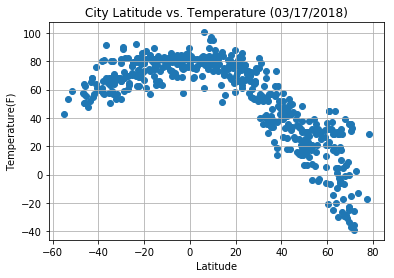

In [26]:
# Build a scatter plot for Latitude Vs Temperature
plt.scatter(citiesCountryDf["Latitude"], citiesCountryDf["Temperature"], marker="o")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Temperature ({Today_Date})" )
plt.ylabel("Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

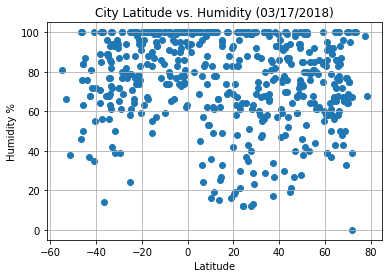

In [27]:
# Build a scatter plot for Latitude Vs Humidity
plt.scatter(citiesCountryDf["Latitude"], citiesCountryDf["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({Today_Date})" )
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

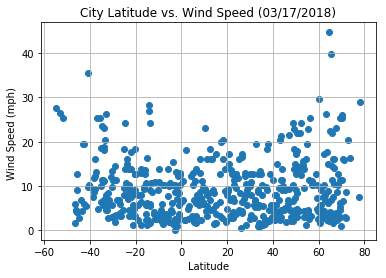

In [28]:
# Build a scatter plot for Latitude Vs Wind Speed
plt.scatter(citiesCountryDf["Latitude"], citiesCountryDf["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({Today_Date})")
plt.ylabel("Wind Speed (mph) ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

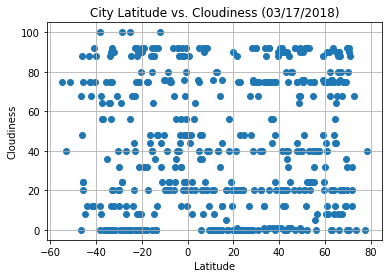

In [29]:
# Build a scatter plot for Latitude Vs Cloudiness
plt.scatter(citiesCountryDf["Latitude"], citiesCountryDf["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({Today_Date})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()